In [1]:
%reload_ext autoreload
%autoreload 2

In [15]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))


In [16]:
from l2gx.align import get_aligner
from l2gx.datasets import get_dataset
from l2gx.embedding import get_embedding
from l2gx.graphs import TGraph
from scripts.plots import plot_datashader_umap

In [3]:
# Load a dataset
dataset = get_dataset("Cora")
pg_data = dataset.to("torch-geometric")
data = TGraph.from_tg(pg_data)
print(f"Loaded {data.num_nodes} nodes, {data.num_edges} edges")

Loaded 2708 nodes, 10556 edges


/Users/u1774790/Projects/G2007/code/L2GX/.venv/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [21]:
# Create and configure L2G aligner
l2g_aligner = get_aligner("l2g")
l2g_aligner.randomized_method = "randomized"
l2g_aligner.sketch_method = "rademacher"

In [22]:
# Create patched embedder using get_embedding
patched_embedder = get_embedding(
    "patched",                  # Use the patched embedding method
    embedding_dim=128,
    aligner=l2g_aligner,        # Required: pre-configured aligner
    num_patches=10,             # Number of patches to create
    min_overlap=256,
    target_overlap=512,
    target_patch_degree=4,
    base_method="vgae",         # Method for embedding each patch
    clustering_method="metis",  # Graph partitioning method
    epochs=200,                 # Parameters for base method
    learning_rate=0.001
)

In [23]:
# Compute embedding
metis_embedding = patched_embedder.fit_transform(data.to_tg())
print(f"Embedding shape: {metis_embedding.shape}")

Computing patch overlaps...
Embedding shape: (2708, 128)


Creating UMAP visualization for embedding of shape (2708, 128)
Computing UMAP embedding...
UMAP complete. Coordinates shape: (2708, 2)
Creating datashader visualization...
Saving plot to cora_l2g_umap.pdf


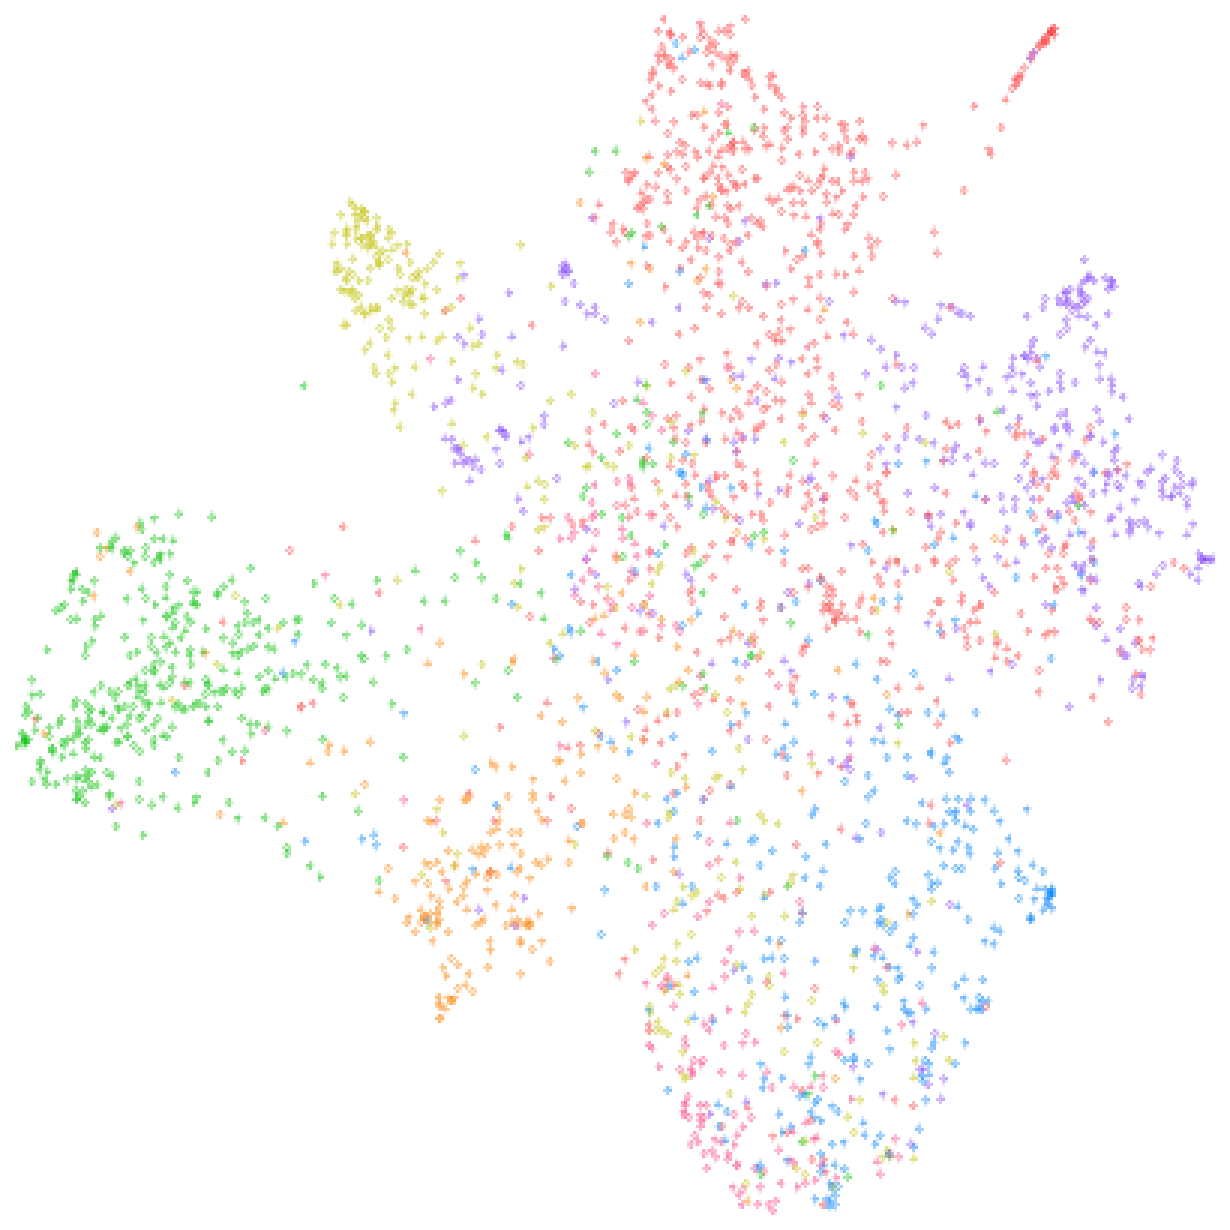

UMAP visualization saved! Shape: (2708, 2)


In [24]:
fig, umap_coords = plot_datashader_umap(
      metis_embedding,
      labels=dataset.y.numpy() if hasattr(dataset.y, 'numpy') else dataset.y,
      title="Patched L2G Embeddings - Cora",
      save_path="cora_l2g_umap.pdf",
      umap_params={'n_neighbors': 30, 'min_dist': 0.1},
      enhance_visibility=True,
      verbose=True
  )

print(f"UMAP visualization saved! Shape: {umap_coords.shape}")

In [25]:
# Create patched embedder using get_embedding
patched_embedder = get_embedding(
    "patched",                  # Use the patched embedding method
    embedding_dim=128,
    aligner=l2g_aligner,        # Required: pre-configured aligner
    num_patches=10,             # Number of patches to create
    min_overlap=256,
    target_overlap=512,
    target_patch_degree=4,
    base_method="vgae",         # Method for embedding each patch
    clustering_method="fennel",  # Graph partitioning method
    epochs=200,                 # Parameters for base method
    learning_rate=0.001
)

In [26]:
# Compute embedding
fennel_embedding = patched_embedder.fit_transform(data.to_tg())
print(f"Embedding shape: {fennel_embedding.shape}")

Starting Fennel clustering: 2708 nodes → 10 clusters
Rust Fennel iteration 0: 2708 nodes not converged
Rust Fennel completed: 10 clusters, sizes: [271, 271, 271, 271, 271, 271, 271, 271, 270, 270]
Computing patch overlaps...
Embedding shape: (2708, 128)


Creating UMAP visualization for embedding of shape (2708, 128)
Computing UMAP embedding...
UMAP complete. Coordinates shape: (2708, 2)
Creating datashader visualization...
Saving plot to cora_l2g_umap.pdf


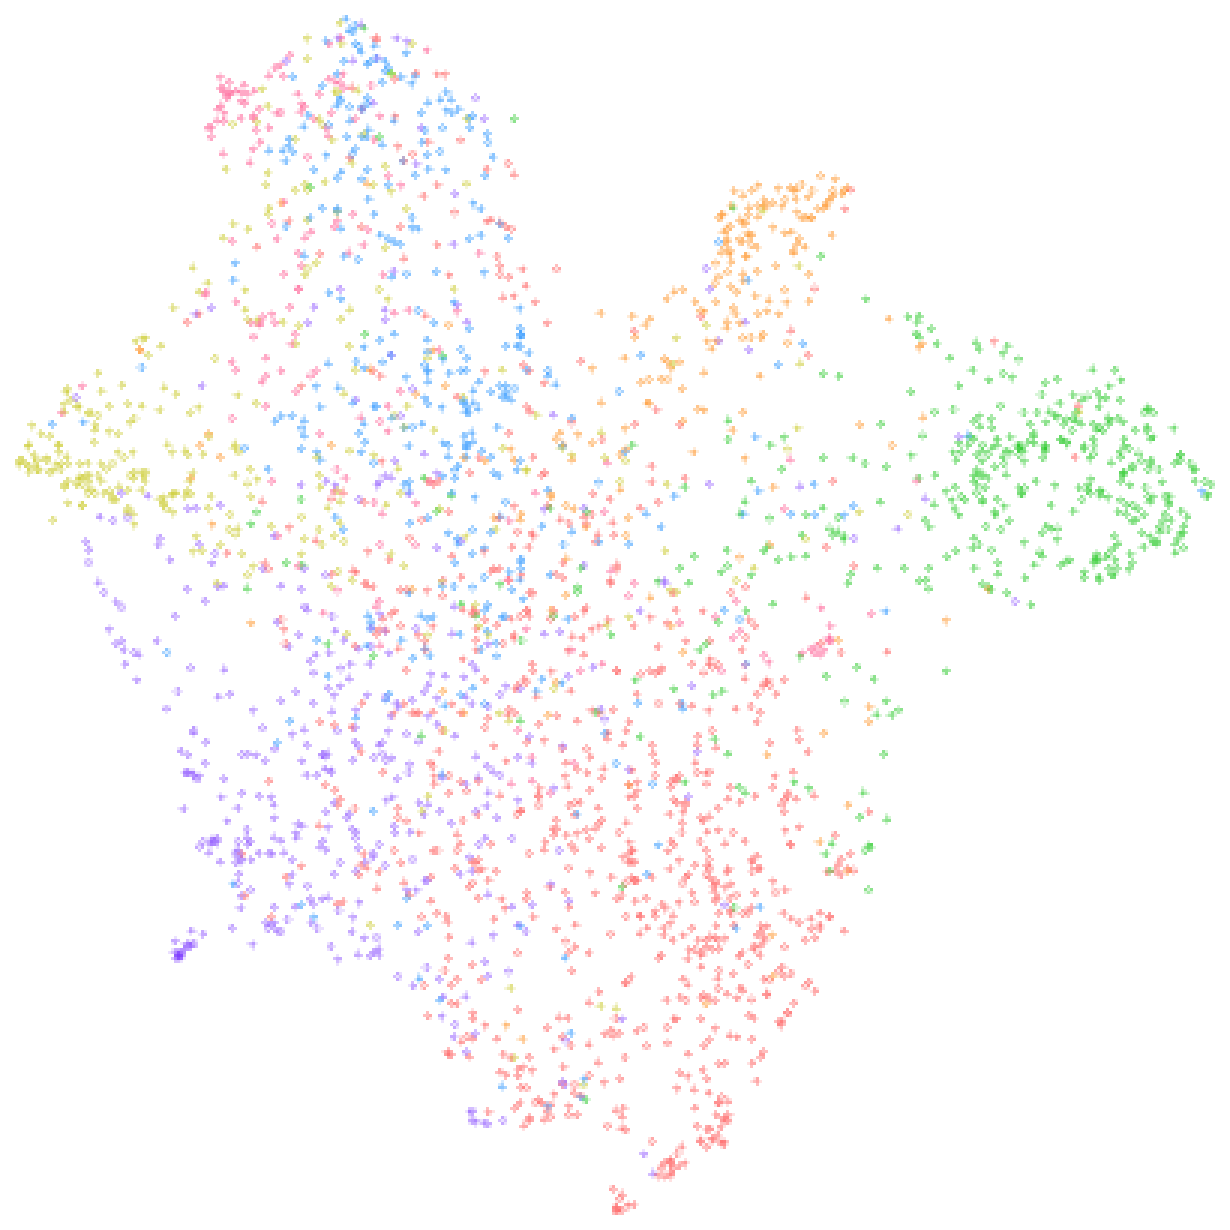

UMAP visualization saved! Shape: (2708, 2)


In [27]:
fig, umap_coords = plot_datashader_umap(
      fennel_embedding,
      labels=dataset.y.numpy() if hasattr(dataset.y, 'numpy') else dataset.y,
      title="Patched L2G Embeddings - Cora",
      save_path="cora_l2g_umap.pdf",
      umap_params={'n_neighbors': 30, 'min_dist': 0.1},
      enhance_visibility=True,
      verbose=True
  )

print(f"UMAP visualization saved! Shape: {umap_coords.shape}")

In [36]:
# Create and configure Geo aligner
geo_aligner = get_aligner("geo",
    method="orthogonal",        # orthogonal or euclidean
    use_scale=True,             # Enable scale optimization
    use_randomized_init=True,
    randomized_method="randomized"
)


In [37]:
# Create patched embedder using get_embedding
patched_embedder = get_embedding(
    "patched",                  # Use the patched embedding method
    embedding_dim=128,
    aligner=geo_aligner,        # Required: pre-configured aligner
    num_patches=10,             # Number of patches to create
    min_overlap=256,
    target_overlap=512,
    target_patch_degree=4,
    base_method="vgae",         # Method for embedding each patch
    clustering_method="fennel",  # Graph partitioning method
    epochs=200,                 # Parameters for base method
    learning_rate=0.001
)

In [38]:
# Compute embedding
fennel_embedding = patched_embedder.fit_transform(data.to_tg())
print(f"Embedding shape: {fennel_embedding.shape}")

Starting Fennel clustering: 2708 nodes → 10 clusters
Rust Fennel iteration 0: 2708 nodes not converged
Rust Fennel completed: 10 clusters, sizes: [271, 271, 271, 271, 271, 271, 271, 271, 270, 270]
Computing patch overlaps...
Embedding shape: (2708, 128)


Creating UMAP visualization for embedding of shape (2708, 128)
Computing UMAP embedding...
UMAP complete. Coordinates shape: (2708, 2)
Creating datashader visualization...
Saving plot to cora_l2g_umap.pdf


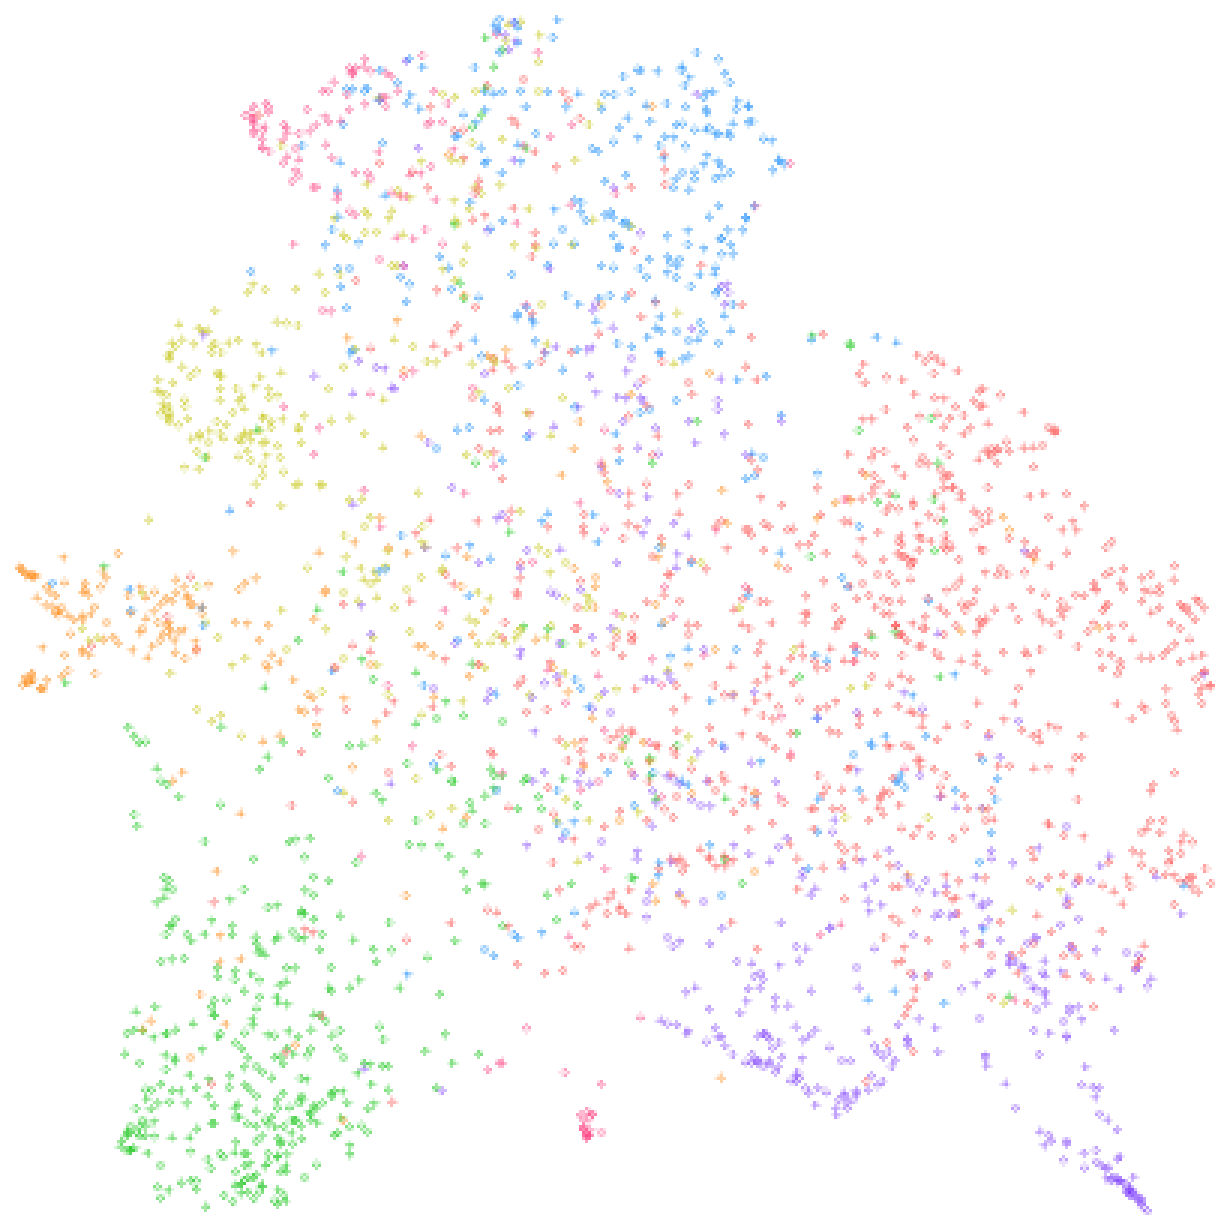

UMAP visualization saved! Shape: (2708, 2)


In [39]:
fig, umap_coords = plot_datashader_umap(
      fennel_embedding,
      labels=dataset.y.numpy() if hasattr(dataset.y, 'numpy') else dataset.y,
      title="Patched L2G Embeddings - Cora",
      save_path="cora_l2g_umap.pdf",
      umap_params={'n_neighbors': 30, 'min_dist': 0.1},
      enhance_visibility=True,
      verbose=True
  )

print(f"UMAP visualization saved! Shape: {umap_coords.shape}")

In [48]:
hierarchical_embedder = get_embedding(
    "hierarchical",                  # Use the patched embedding method
    embedding_dim=128,
    aligner=l2g_aligner,        # Required: pre-configured aligner
    max_patch_size=500,             # Number of patches to create
    branching_factor=2,
    min_overlap=128,
    target_overlap=256,
    target_patch_degree=4,
    base_method="vgae",         # Method for embedding each patch
    clustering_method="metis",  # Graph partitioning method
    epochs=200,                 # Parameters for base method
    learning_rate=0.001
)

In [49]:
# Compute embedding (L2G alignment will be used for ternary splits)
embedding = hierarchical_embedder.fit_transform(data.to_tg())
print(f"Embedding shape: {embedding.shape}")

Embedding shape: (2708, 128)


In [50]:
# Get tree structure information
tree_info = hierarchical_embedder.get_tree_structure()
print(f"Tree depth: {tree_info['max_depth']}")
print(f"Number of leaves: {tree_info['num_leaves']}")

Tree depth: 5
Number of leaves: 17


Creating UMAP visualization for embedding of shape (2708, 128)
Computing UMAP embedding...
UMAP complete. Coordinates shape: (2708, 2)
Creating datashader visualization...
Saving plot to cora_l2g_umap.pdf


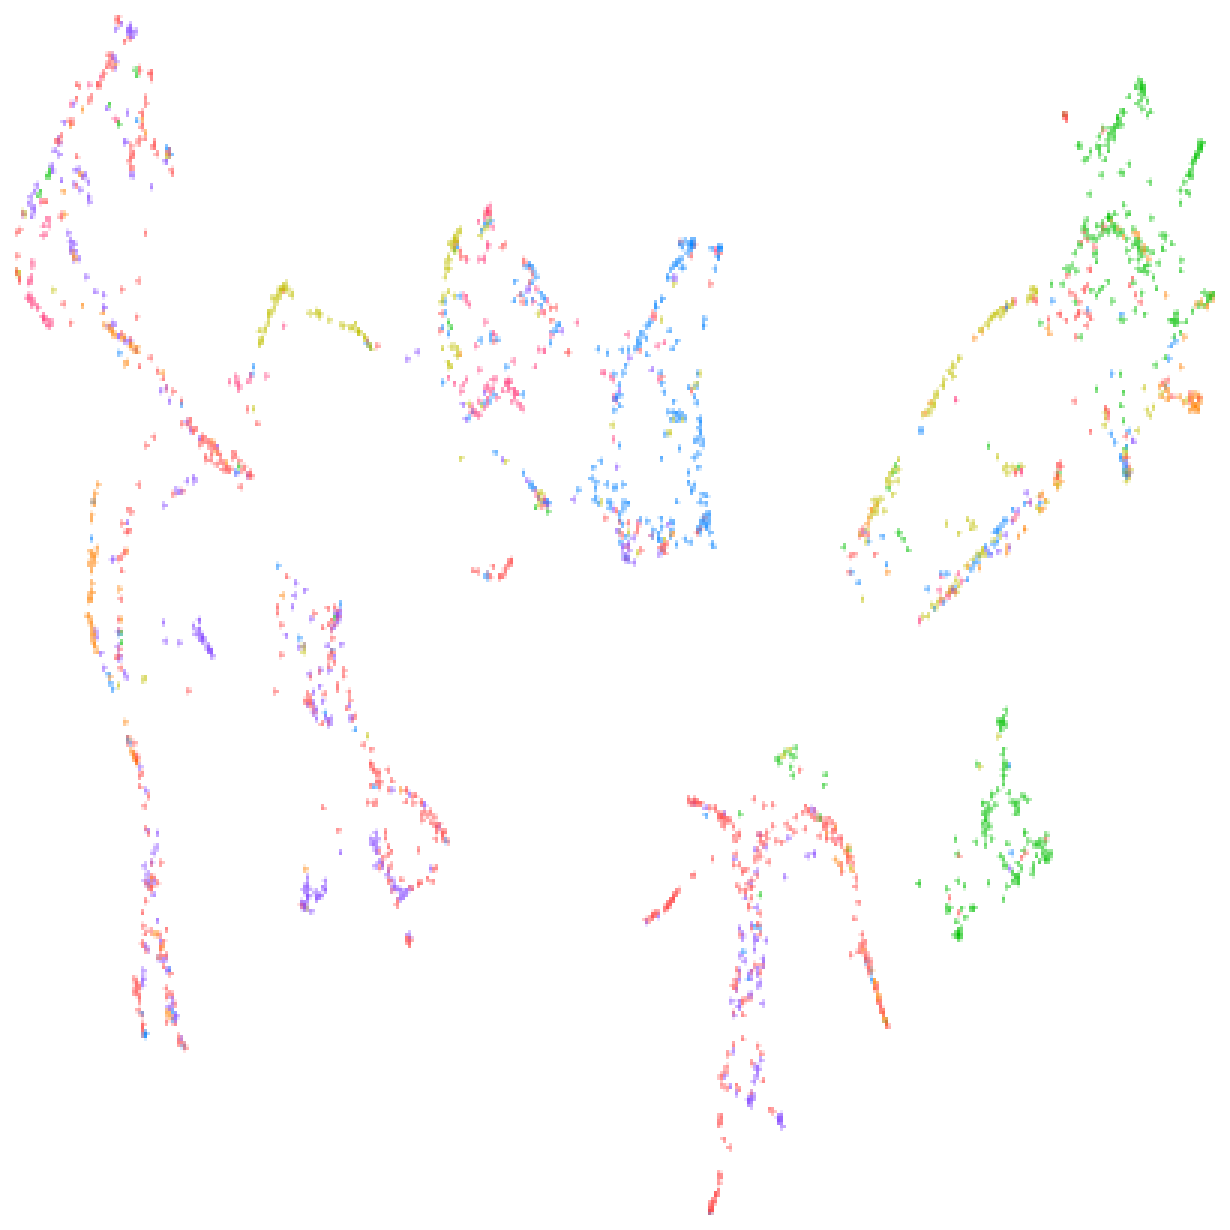

UMAP visualization saved! Shape: (2708, 2)


In [51]:
fig, umap_coords = plot_datashader_umap(
      embedding,
      labels=dataset.y.numpy() if hasattr(dataset.y, 'numpy') else dataset.y,
      title="Patched L2G Embeddings - Cora",
      save_path="cora_l2g_umap.pdf",
      umap_params={'n_neighbors': 30, 'min_dist': 0.1},
      enhance_visibility=True,
      verbose=True
  )

print(f"UMAP visualization saved! Shape: {umap_coords.shape}")